In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date

In [2]:
evds=evdsAPI('dsIC3fiGlu')


In [3]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4592,08-09-2023,26.8531
4593,11-09-2023,26.8570
4594,12-09-2023,26.8897
4595,13-09-2023,26.9066


In [4]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [5]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84


In [6]:
inflation=enf
inflation=pd.DataFrame(inflation)
inflation.columns=["Tarih","TÜFE"]


In [7]:

inflationagt=pd.DataFrame.from_dict({'Tarih':"2023-9",'TÜFE': [1677]})
inflation=pd.concat([inflation,inflationagt],axis=0)
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


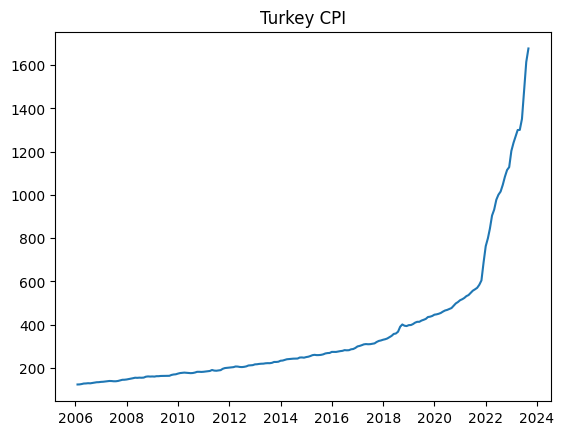

In [8]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure()
plt.title("Turkey CPI")

plt.plot(df)
plt.show()


In [9]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [10]:
dates= pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df6=df6.set_index(dates)

df6["Onceki USD/TL"]=df6["USD/TL"].shift(1)
df6.iloc[0,1]=1.32
df6

,USD/TL,Onceki USD/TL
2006-02-01,1.326535,1.320000
2006-03-01,1.335139,1.326535
2006-04-01,1.337345,1.335139
2006-05-01,1.420659,1.337345
2006-06-01,1.600536,1.420659
...,...,...
2023-05-01,19.719514,19.337032
2023-06-01,23.106042,19.719514
2023-07-01,26.470338,23.106042
2023-08-01,26.999127,26.470338


In [11]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202529e+10


In [12]:
#Cleaning the data

money_supply=pd.DataFrame(money)
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money_supply


,Tarih,Para Arzi
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202529e+10


In [13]:
money_supply=money_supply.set_index(dates)
money_supply["Para Arzi"]=money_supply["Para Arzi"]/1e+08
money_supply
dfn=pd.DataFrame(money_supply)
del dfn["Tarih"]
dfn["Para Arzi Onceki"]=dfn["Para Arzi"].shift(1)
dfn.iloc[0,1]=2.39
dfn


,Para Arzi,Para Arzi Onceki
2006-02-01,2.423895,2.390000
2006-03-01,2.494857,2.423895
2006-04-01,2.521919,2.494857
2006-05-01,2.751947,2.521919
2006-06-01,2.791388,2.751947
...,...,...
2023-05-01,94.093167,95.059993
2023-06-01,108.345324,94.093167
2023-07-01,114.784753,108.345324
2023-08-01,120.252858,114.784753


In [14]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4585,30-08-2023,86.62
4586,31-08-2023,87.29
4587,01-09-2023,89.98
4588,04-09-2023,90.42


In [15]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle
brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [16]:

brent1=pd.DataFrame(brent)
brent1.columns=["Brent"]
brent1


,Brent
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [17]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

df14["Brent"]=brent1["Brent"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\3566834801.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Brent
TIME,
2006-02-01,60.210000
2006-03-01,62.064783
2006-04-01,70.260000
2006-05-01,69.776957
2006-06-01,68.555909
...,...
2023-05-01,75.466000
2023-06-01,74.839091
2023-07-01,80.108095


In [18]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09
210,2023-8,9.923806e+09


In [19]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
207,2023-5,88.043441
208,2023-6,95.646045
209,2023-7,98.468952
210,2023-8,99.238055


In [20]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3

C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\2513009782.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Kredi
TIME,
2006-02-01,1.381847
2006-03-01,1.481222
2006-04-01,1.527510
2006-05-01,1.664881
2006-06-01,1.740395
...,...
2023-05-01,88.043441
2023-06-01,95.646045
2023-07-01,98.468952


In [21]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.iloc[:59,1]=5
pfaiz.iloc[210,1]=25
pfaiz


,Tarih,TP_APIFON4
0,2006-2,5.00
1,2006-3,5.00
2,2006-4,5.00
3,2006-5,5.00
4,2006-6,5.00
...,...,...
207,2023-5,9.09
208,2023-6,12.84
209,2023-7,17.50
210,2023-8,25.00


In [22]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\3293406371.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Politika Faizi
TIME,
2006-02-01,5.00
2006-03-01,5.00
2006-04-01,5.00
2006-05-01,5.00
2006-06-01,5.00
...,...
2023-05-01,9.09
2023-06-01,12.84
2023-07-01,17.50


In [23]:
X=pd.concat([df6["Onceki USD/TL"],dfn["Para Arzi Onceki"],df14.Brent,df3.Kredi,pfaiz["Politika Faizi"]],axis=1)



In [24]:
y=pd.DataFrame(df["CPI"])
y["CPI"]=y["CPI"].astype(float)
y


,CPI
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.20
2006-06-01,128.63
...,...
2023-05-01,1300.60
2023-06-01,1351.59
2023-07-01,1479.84
2023-08-01,1614.31


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.021e+04
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          1.32e-179
Time:                        14:26:46   Log-Likelihood:                -614.49
No. Observations:                 148   AIC:                             1241.
Df Residuals:                     142   BIC:                             1259.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               84.7338      5.253  

In [27]:
results.params

const               84.733799
Onceki USD/TL        7.018768
Para Arzi Onceki     9.326065
Brent                0.230299
Kredi                2.362222
Politika Faizi       0.144425
dtype: float64

In [28]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df14.astype(float),
                                order=(0,1,0),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [30]:
pred_ci['Predicted'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
pred_ci['Observed'] = df14["Brent"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Brent,upper Brent,Predicted,Observed,"Diff, %%"
2022-12-01,76.757637,106.835953,91.796795,80.996667,13.334040
2023-01-01,70.379074,100.457389,85.418232,82.515909,3.517288
2023-02-01,69.737176,99.815492,84.776334,82.585000,2.653429
2023-03-01,66.325022,96.403337,81.364179,78.434348,3.735394
2023-04-01,52.829884,82.908200,67.869042,84.739474,-19.908587
2023-05-01,78.176313,108.254629,93.215471,75.466000,23.519825
2023-06-01,69.580579,99.658895,84.619737,74.839091,13.068900
2023-07-01,57.197032,87.275347,72.236190,80.108095,-9.826604
2023-08-01,60.315710,90.394025,75.354868,86.147727,-12.528316
2023-09-01,66.090153,96.168469,81.129311,90.550000,-10.403853


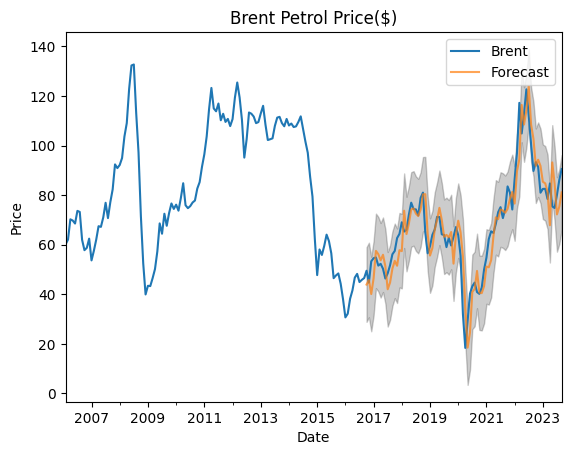

In [31]:
ax = df14['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")
plt.legend()
plt.show()

In [31]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

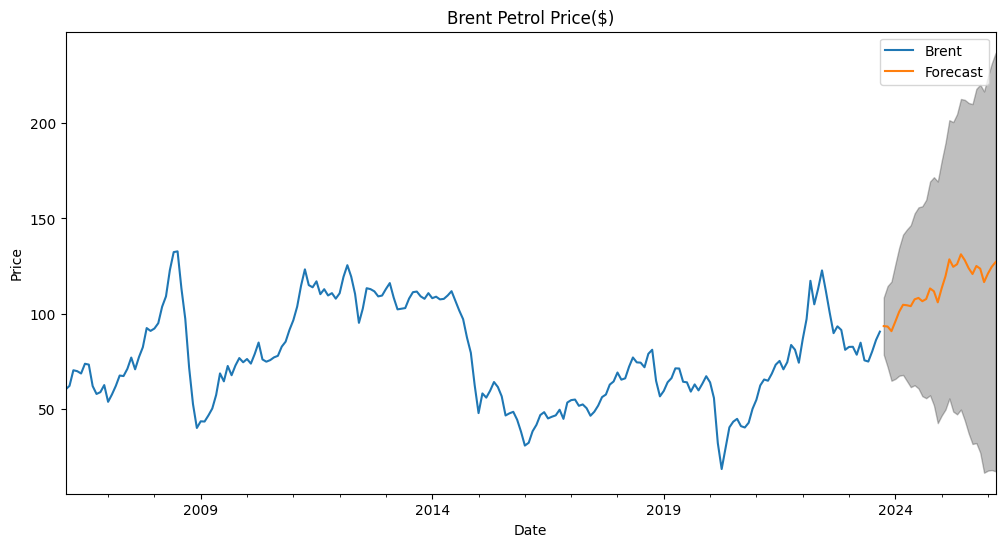

In [33]:
ax = df14.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")

plt.legend()

plt.show()

In [32]:
pred_ci['Mean'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
brenttahmin=pred_ci["Mean"]
brenttahmin=pd.DataFrame(brenttahmin)
brenttahmin.columns=["Brent"]
brenttahmin



,Brent
2023-10-01,93.446344
2023-11-01,93.232299
2023-12-01,90.802761
2024-01-01,95.791469
2024-02-01,101.002054
2024-03-01,104.643949
2024-04-01,104.400700
2024-05-01,103.931412
2024-06-01,107.503428
2024-07-01,108.254603


In [33]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(dfn["Para Arzi Onceki"].astype(float),
                                order=(1,1,1),
                                seasonal_order=(0,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [35]:
pred_ci['Predicted'] = (pred_ci["lower Para Arzi Onceki"] + pred_ci["upper Para Arzi Onceki"])/2
pred_ci['Observed'] = dfn["Para Arzi Onceki"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Para Arzi Onceki,upper Para Arzi Onceki,Predicted,Observed,"Diff, %%"
2022-12-01,79.788126,83.861012,81.824569,79.312824,3.166883
2023-01-01,80.897807,84.970528,82.934168,82.127970,0.981636
2023-02-01,83.538904,87.611463,85.575183,84.330974,1.475388
2023-03-01,85.913361,89.985919,87.949640,86.852197,1.263575
2023-04-01,89.279492,93.351887,91.315690,90.592762,0.797997
2023-05-01,92.887929,96.960165,94.924047,95.059993,-0.143011
2023-06-01,97.777084,101.849163,99.813123,94.093167,6.079035
2023-07-01,96.512503,100.584428,98.548465,108.345324,-9.042253
2023-08-01,111.514801,115.586575,113.550688,114.784753,-1.075112
2023-09-01,118.297222,122.368847,120.333034,120.252858,0.066673


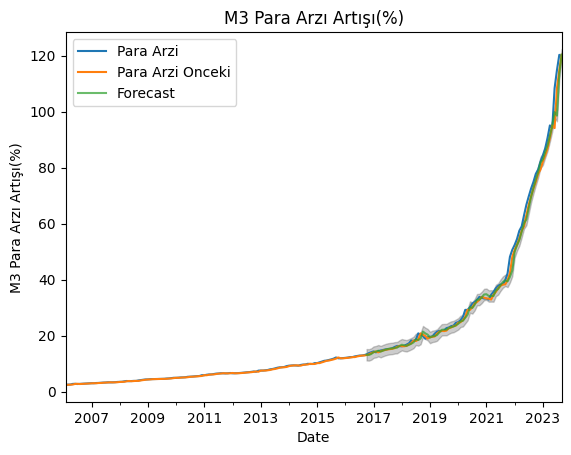

In [38]:
ax = dfn['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('M3 Para Arzı Artışı(%)')
plt.title("M3 Para Arzı Artışı(%)")
plt.legend()
plt.show()

In [36]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

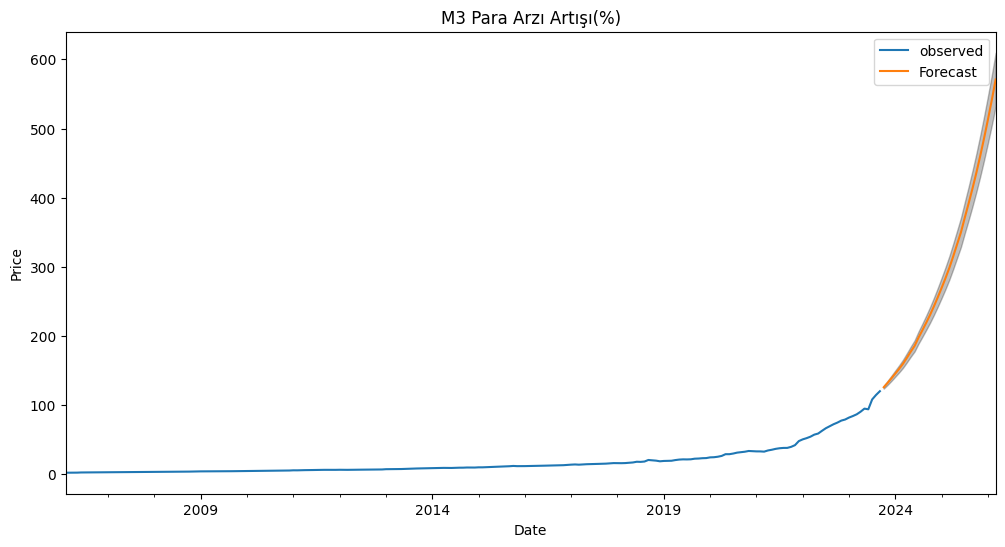

In [40]:
ax = dfn["Para Arzi Onceki"].plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("M3 Para Arzı Artışı(%)")

plt.legend()

plt.show()

In [37]:
import random
import numpy as np
pred_ci['Mean'] = (pred_ci["lower Para Arzi Onceki"] + pred_ci["upper Para Arzi Onceki"])/2
paraarzitahmin=pred_ci["Mean"]
paraarzitahmin=pd.DataFrame(paraarzitahmin)
paraarzitahmin.columns=["Para Arzi Tahmin"]
paraarzitahmin




,Para Arzi Tahmin
2023-10-01,125.963440
2023-11-01,132.260261
2023-12-01,138.928542
2024-01-01,145.809736
2024-02-01,152.669418
2024-03-01,160.011041
2024-04-01,168.563033
2024-05-01,177.444605
2024-06-01,185.801598
2024-07-01,197.630267


In [38]:
y=float(input('Para Arzi Aylık En Fazla % Kaç Artacağını Girin: '))
def paraarziassumption(y):
   drop_percentage = random.uniform(1+(y/300), 1+(y/100))
   
   paraarzitahmin["Para Arzi Assumption 2"]=paraarzitahmin["Para Arzi Tahmin"]
   
   for i in range(0, len(paraarzitahmin)-1):
   
      paraarzitahmin["Para Arzi Assumption 2"][i+1]=paraarzitahmin["Para Arzi Assumption 2"][i]*drop_percentage
   return paraarzitahmin
      
paraarziassumption(y)


C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\1571707984.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paraarzitahmin["Para Arzi Assumption 2"][i+1]=paraarzitahmin["Para Arzi Assumption 2"][i]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\1571707984.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  paraarzitahmin["Para Arzi Assumption 2"][i+1]=paraarzitahmin["Para Arzi Assumption 2"][i]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\1571707984.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

,Para Arzi Tahmin,Para Arzi Assumption 2
2023-10-01,125.963440,125.963440
2023-11-01,132.260261,130.316079
2023-12-01,138.928542,134.819123
2024-01-01,145.809736,139.477768
2024-02-01,152.669418,144.297392
2024-03-01,160.011041,149.283556
2024-04-01,168.563033,154.442017
2024-05-01,177.444605,159.778727
2024-06-01,185.801598,165.299846
2024-07-01,197.630267,171.011746


In [39]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df6["USD/TL"].astype(float),
                                order=(0,1,1),
                                seasonal_order=(1,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [41]:
pred_ci['Predicted'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
pred_ci['Observed'] = df6["USD/TL"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower USD/TL,upper USD/TL,Predicted,Observed,"Diff, %%"
2022-12-01,18.100125,19.611966,18.856045,18.670545,0.993543
2023-01-01,17.571220,19.083061,18.327141,18.791373,-2.470453
2023-02-01,18.162170,19.674010,18.918090,18.857210,0.322847
2023-03-01,18.675928,20.187769,19.431848,19.003478,2.254167
2023-04-01,18.389142,19.900982,19.145062,19.337032,-0.992757
2023-05-01,19.064480,20.576320,19.820400,19.719514,0.511605
2023-06-01,19.355951,20.867791,20.111871,23.106042,-12.958391
2023-07-01,24.482761,25.994601,25.238681,26.470338,-4.652970
2023-08-01,26.624022,28.135862,27.379942,26.999127,1.410470
2023-09-01,26.097720,27.609561,26.853640,26.830760,0.085276


In [42]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

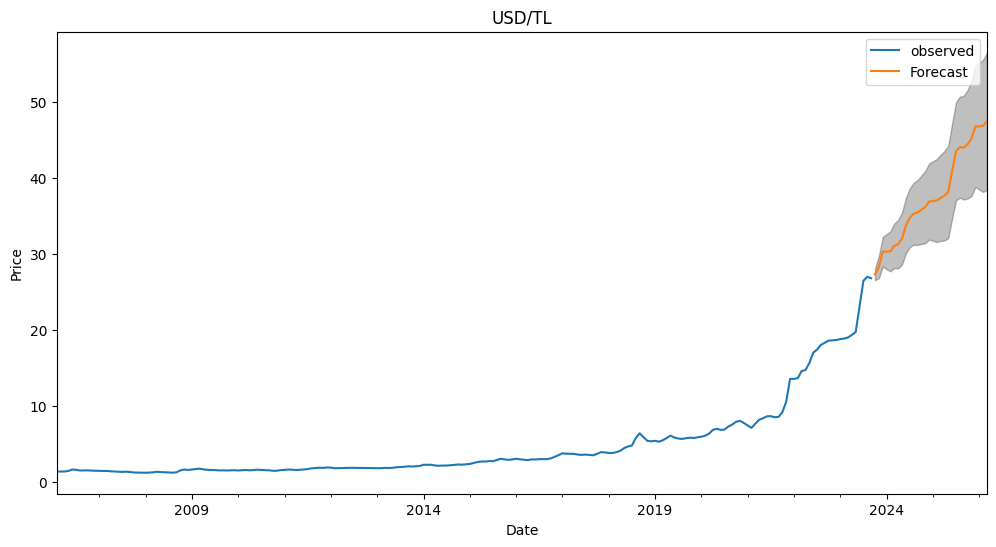

In [47]:
ax = df6["USD/TL"].plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("USD/TL")

plt.legend()

plt.show()

In [43]:
pred_ci['Mean'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
usdtahmin=pred_ci["Mean"]
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin.columns=["USD Tahmin"]







usdtahmin

,USD Tahmin
2023-10-01,27.338084
2023-11-01,28.297647
2023-12-01,30.336272
2024-01-01,30.330695
2024-02-01,30.389328
2024-03-01,31.115912
2024-04-01,31.320569
2024-05-01,32.065370
2024-06-01,33.758765
2024-07-01,34.802817


In [44]:
import random
x=float(input('Dolar/TL Aylık En Fazla % Kaç Artacağını Girin:   '))
def usdassumption(x):
    
  drop_percentage = random.uniform(1+(x/200), 1+(x/100))
  usdtahmin["USD Tahmin Assumption 2"]=usdtahmin["USD Tahmin"]
  for i in range(0, len(usdtahmin)-3):
   
    usdtahmin["USD Tahmin Assumption 2"][i+3]=usdtahmin["USD Tahmin Assumption 2"][i+2]*drop_percentage

  return usdtahmin

usdassumption(x)
  



C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\4181643103.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  usdtahmin["USD Tahmin Assumption 2"][i+3]=usdtahmin["USD Tahmin Assumption 2"][i+2]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\4181643103.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  usdtahmin["USD Tahmin Assumption 2"][i+3]=usdtahmin["USD Tahmin Assumption 2"][i+2]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\4181643103.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

,USD Tahmin,USD Tahmin Assumption 2
2023-10-01,27.338084,27.338084
2023-11-01,28.297647,28.297647
2023-12-01,30.336272,30.336272
2024-01-01,30.330695,30.853460
2024-02-01,30.389328,31.379465
2024-03-01,31.115912,31.914438
2024-04-01,31.320569,32.458532
2024-05-01,32.065370,33.011901
2024-06-01,33.758765,33.574705
2024-07-01,34.802817,34.147103


In [45]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df3.astype(float),
                                order=(3,1,0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [47]:
pred_ci['Predicted'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
pred_ci['Observed'] = df3["Kredi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Kredi,upper Kredi,Predicted,Observed,"Diff, %%"
2022-12-01,69.441178,72.360955,70.901067,72.851339,-2.677057
2023-01-01,72.575705,75.495482,74.035593,75.079809,-1.390808
2023-02-01,75.572732,78.492509,77.032621,77.112692,-0.103837
2023-03-01,78.640386,81.560163,80.100274,82.109915,-2.447501
2023-04-01,83.706561,86.626338,85.166449,85.721139,-0.647086
2023-05-01,87.371604,90.291381,88.831492,88.043441,0.895071
2023-06-01,89.419506,92.339283,90.879395,95.646045,-4.983635
2023-07-01,97.413838,100.333615,98.873726,98.468952,0.411068
2023-08-01,98.850146,101.769923,100.310034,99.238055,1.080210
2023-09-01,101.253297,104.173074,102.713185,100.034254,2.678014


In [48]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

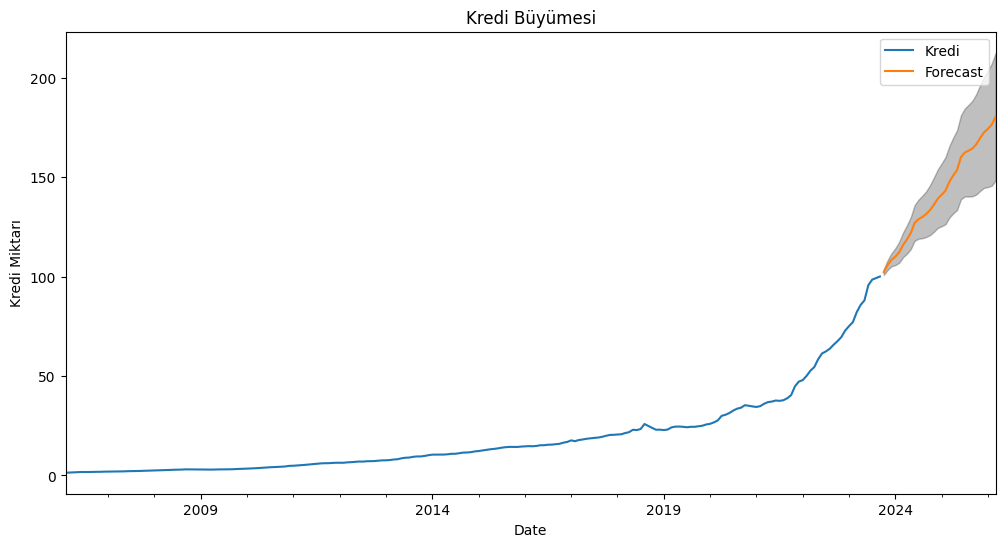

In [54]:
ax = df3.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Kredi Miktarı')
plt.title("Kredi Büyümesi")

plt.legend()

plt.show()

In [49]:
import random
pred_ci['Mean'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
kreditahmin=pred_ci["Mean"]
kreditahmin=pd.DataFrame(kreditahmin)
kreditahmin.columns=["Kredi Tahmin"]
kreditahmin




,Kredi Tahmin
2023-10-01,102.289648
2023-11-01,105.783649
2023-12-01,108.439362
2024-01-01,110.013571
2024-02-01,112.196820
2024-03-01,115.922374
2024-04-01,118.630558
2024-05-01,121.856179
2024-06-01,126.977091
2024-07-01,128.859484


In [51]:
z=float(input('Kredi Hacmi Aylık En Fazla % Kaç Artacağını Girin: '))
def krediassumption(z):

   drop_percentage = random.uniform(0.97, 1+(z/100))
   drop_percentage1=random.uniform(0.005, 0.01)
   kreditahmin["Kredi Tahmin Assumption 2"]=kreditahmin["Kredi Tahmin"]
   for i in range(0, len(kreditahmin)-1):
   
      kreditahmin["Kredi Tahmin Assumption 2"][i+1]=kreditahmin["Kredi Tahmin Assumption 2"][i]*drop_percentage
   return kreditahmin
krediassumption(z)
   

C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\3476548468.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kreditahmin["Kredi Tahmin Assumption 2"][i+1]=kreditahmin["Kredi Tahmin Assumption 2"][i]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\3476548468.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  kreditahmin["Kredi Tahmin Assumption 2"][i+1]=kreditahmin["Kredi Tahmin Assumption 2"][i]*drop_percentage
C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\3476548468.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

,Kredi Tahmin,Kredi Tahmin Assumption 2
2023-10-01,102.289648,102.289648
2023-11-01,105.783649,102.427387
2023-12-01,108.439362,102.565310
2024-01-01,110.013571,102.703420
2024-02-01,112.196820,102.841715
2024-03-01,115.922374,102.980197
2024-04-01,118.630558,103.118865
2024-05-01,121.856179,103.257720
2024-06-01,126.977091,103.396762
2024-07-01,128.859484,103.535991


In [52]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(pfaiz.astype(float),
                                order=(3,1,0),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [53]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [54]:
pred_ci['Predicted'] = (pred_ci["lower Politika Faizi"] + pred_ci["upper Politika Faizi"])/2
pred_ci['Observed'] = pfaiz["Politika Faizi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Politika Faizi,upper Politika Faizi,Predicted,Observed,"Diff, %%"
2022-12-01,6.009914,10.288318,8.149116,9.04,-9.854914
2023-01-01,6.735574,11.013977,8.874775,9.00,-1.391386
2023-02-01,6.448349,10.726752,8.587551,8.76,-1.968601
2023-03-01,6.824580,11.102983,8.963781,8.56,4.717072
2023-04-01,5.707745,9.986146,7.846945,8.70,-9.805229
2023-05-01,7.049258,11.327659,9.188459,9.09,1.083155
2023-06-01,6.954998,11.233399,9.094199,12.84,-29.172907
2023-07-01,11.129401,15.407802,13.268602,17.50,-24.179418
2023-08-01,18.544810,22.823210,20.684010,25.00,-17.263961
2023-09-01,26.168778,30.447178,28.307978,25.00,13.231911


In [55]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

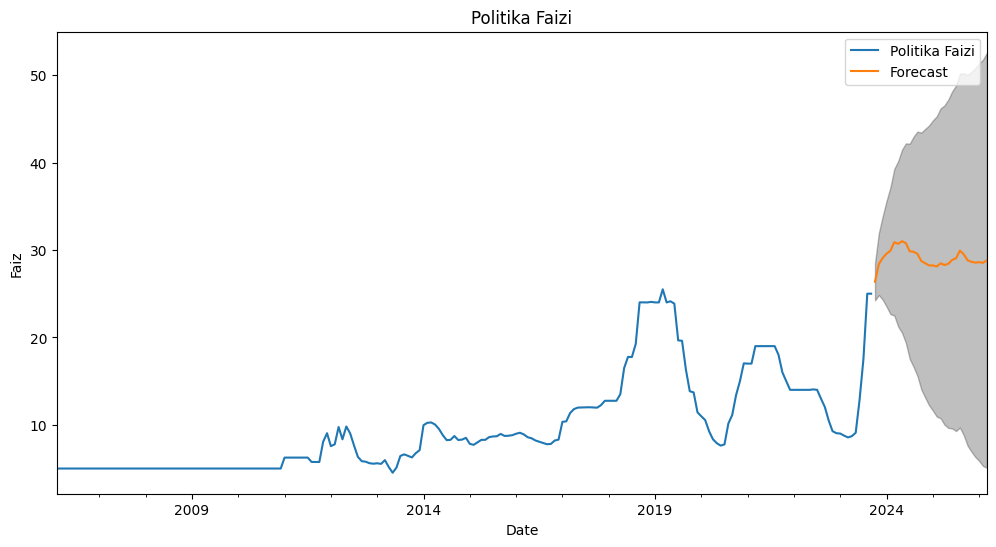

In [61]:
ax = pfaiz.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Faiz')
plt.title("Politika Faizi")

plt.legend()

plt.show()

In [56]:
pred_ci['Mean'] = (pred_ci["lower Politika Faizi"] + pred_ci["upper Politika Faizi"])/2
faiztahmin=pred_ci["Mean"]
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Politika Faizi"]
faiztahmin["Politika Faizi"]=faiztahmin["Politika Faizi"].astype(int)
faiztahmin

,Politika Faizi
2023-10-01,26
2023-11-01,28
2023-12-01,29
2024-01-01,29
2024-02-01,29
2024-03-01,30
2024-04-01,30
2024-05-01,31
2024-06-01,30
2024-07-01,29


In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()










res2=[]
res3=[]


for i in range(30):
    res2.append(results.params["const"]+results.params["Onceki USD/TL"]*usdtahmin["USD Tahmin"][i]+results.params["Para Arzi Onceki"]*paraarzitahmin["Para Arzi Tahmin"][i]+results.params["Kredi"]*kreditahmin["Kredi Tahmin"][i]+results.params["Brent"]*brenttahmin["Brent"][i]+results.params["Politika Faizi"]*faiztahmin["Politika Faizi"][i])
    res3.append(results.params["const"]+results.params["Onceki USD/TL"]*usdtahmin["USD Tahmin Assumption 2"][i]+results.params["Para Arzi Onceki"]*paraarzitahmin["Para Arzi Assumption 2"][i]+results.params["Kredi"]*kreditahmin["Kredi Tahmin Assumption 2"][i]+results.params["Brent"]*brenttahmin["Brent"][i]+results.params["Politika Faizi"]*faiztahmin["Politika Faizi"][i])
   
    



df9=pd.DataFrame()
dates=pd.date_range('2023-09-01','2026-03-01' , freq='1M')-pd.offsets.MonthBegin(1)
df9["Inflation"]=res2
df9["Assumption 2 Inflation"]=res3
df9['TIME']=dates
df9=df9.set_index(dates)
del df9['TIME']
df9

C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\655677746.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res2.append(results.params["const"]+results.params["Onceki USD/TL"]*usdtahmin["USD Tahmin"][i]+results.params["Para Arzi Onceki"]*paraarzitahmin["Para Arzi Tahmin"][i]+results.params["Kredi"]*kreditahmin["Kredi Tahmin"][i]+results.params["Brent"]*brenttahmin["Brent"][i]+results.params["Politika Faizi"]*faiztahmin["Politika Faizi"][i])
C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\655677746.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res3.append(results.params["const"]+results.params["Onceki USD/TL

,Inflation,Assumption 2 Inflation
2023-09-01,1718.263198,1718.263198
2023-10-01,1792.215863,1766.156061
2023-11-01,1874.571605,1822.371085
2023-12-01,1943.574461,1870.923077
2024-01-01,2014.317136,1921.089789
2024-02-01,2097.669054,1972.656211
2024-03-01,2185.203236,2024.854761
2024-04-01,2280.916925,2078.873591
2024-05-01,2383.515263,2135.320748
2024-06-01,2505.633358,2192.965292


In [86]:

data=pd.DataFrame()
dates=pd.date_range(start='2006-02-01', periods=211, freq='M')

# Veriyi bir veri çerçevesine yerleştirme


data["Döviz Kuru"]=df6["USD/TL"].shift(1)
data["Para Arzı"]=dfn["Para Arzi"]
data["Petrol"]=df14["Brent"]
data["Kredi Hacmi"]=df3["Kredi"]
data["TÜFE"]=df["CPI"]
data=data.head(211)
data.set_index(dates, inplace=True)
data.dropna(inplace=True)

data=data.head(210)
data




,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,TÜFE
2006-03-31,1.326535,2.494857,62.064783,1.481222,124.18
2006-04-30,1.335139,2.521919,70.260000,1.527510,125.84
2006-05-31,1.337345,2.751947,69.776957,1.664881,128.20
2006-06-30,1.420659,2.791388,68.555909,1.740395,128.63
2006-07-31,1.600536,2.711670,73.674286,1.731811,129.72
...,...,...,...,...,...
2023-04-30,19.003478,95.059993,84.739474,85.721139,1300.04
2023-05-31,19.337032,94.093167,75.466000,88.043441,1300.60
2023-06-30,19.719514,108.345324,74.839091,95.646045,1351.59
2023-07-31,23.106042,114.784753,80.108095,98.468952,1479.84


In [87]:
endog_var=data["TÜFE"]
exog_vars=data[["Döviz Kuru","Para Arzı","Petrol","Kredi Hacmi"]]   

In [88]:
data["random_walk_component"] = data['Döviz Kuru'].shift(1)
data=data.dropna()
data

,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,TÜFE,random_walk_component
2006-04-30,1.335139,2.521919,70.260000,1.527510,125.84,1.326535
2006-05-31,1.337345,2.751947,69.776957,1.664881,128.20,1.335139
2006-06-30,1.420659,2.791388,68.555909,1.740395,128.63,1.337345
2006-07-31,1.600536,2.711670,73.674286,1.731811,129.72,1.420659
2006-08-31,1.558267,2.754820,73.230435,1.742468,129.15,1.600536
...,...,...,...,...,...,...
2023-04-30,19.003478,95.059993,84.739474,85.721139,1300.04,18.857210
2023-05-31,19.337032,94.093167,75.466000,88.043441,1300.60,19.003478
2023-06-30,19.719514,108.345324,74.839091,95.646045,1351.59,19.337032
2023-07-31,23.106042,114.784753,80.108095,98.468952,1479.84,19.719514


In [93]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa



# Parametrelerin zaman içinde değişeceği random walk süreçlerini oluşturun
param_dolar = np.cumsum(np.random.randn(209))  # Dolar parametresi için


# Hata teriminin zaman içinde değişeceği süreci oluşturun (2 lag)
error_term = np.random.randn(209)
for t in range(2, 209):
    error_term[t] += 0.7 * error_term[t - 1] + 0.2 * error_term[t - 2]

# Hata teriminin dağılımı için t-dağılımı kullanın (serbestlik derecesi tahmin ediliyor)
degrees_of_freedom = np.abs(np.random.randn(209)) * 10 + 2  # Rastgele serbestlik derecesi

# Stokastik volatiliteyi oluşturun (varyans da zaman içinde random walk)
volatility = np.exp(np.cumsum(np.random.randn(209)))  # Logaritmik volatiliteyi oluşturun

# Tüm bu oluşturulan süreçleri bir DataFrame'e ekleyin
data['Param_Dolar'] = param_dolar
data['Error_Term'] = error_term
data['Degrees_of_Freedom'] = degrees_of_freedom
data['Volatility'] = volatility

model_data = data
model = tsa.VAR(model_data)

# Modeli uyarlayın (4 lag)
results = model.fit(maxlags=1)

# Tahminleri yapın (örneğin, son 12 aylık öngörü)
forecast_horizon = 12
forecast_input = model_data.iloc[-4:, :].values  # Son 4 gözlemi kullanarak tahmin ediyoruz
forecast = results.forecast(y=forecast_input, steps=forecast_horizon)

forecast=pd.DataFrame(forecast[:,4:6])
forecast.columns=["TÜFE","Random Walk"]
forecast["TÜFE"]+=forecast["Random Walk"]
del forecast["Random Walk"]
forecast



C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\2181969546.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Param_Dolar'] = param_dolar
C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\2181969546.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Error_Term'] = error_term
C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\2181969546.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,TÜFE
0,1742.639426
1,1830.747426
2,1908.421803
3,1983.560039
4,2062.997682
5,2151.119285
6,2249.749183
7,2358.783838
8,2477.097808
9,2603.364843


In [94]:
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
tahmin6=pd.DataFrame(forecast["TÜFE"])
tahmin6=tahmin6.set_index(dates)
tahmin6.columns=["TÜFE"]
tahmin6

,TÜFE
2023-09-01,1742.639426
2023-10-01,1830.747426
2023-11-01,1908.421803
2023-12-01,1983.560039
2024-01-01,2062.997682
2024-02-01,2151.119285
2024-03-01,2249.749183
2024-04-01,2358.783838
2024-05-01,2477.097808
2024-06-01,2603.364843


In [64]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as sm


model = sm.VECM(data)
results = model.fit()

# TÜFE'nin gelecekteki değerlerini tahmin et
tahmin = results.predict(steps=12, alpha=0.05)

tahmin1=pd.DataFrame(tahmin[0],columns=['Döviz Kuru','Para Arzi','Petrol','Kredi Hacmi','TÜFE','Param_Dolar','Error_Term','Degrees_of_Freedom','Volatility'])


tahmin2=pd.DataFrame(tahmin[1],columns=['Döviz Kuru','Para Arzi','Petrol','Kredi Hacmi','TÜFE','Param_Dolar','Error_Term','Degrees_of_Freedom','Volatility'])
tahmin3=pd.DataFrame(tahmin[2],columns=['Döviz Kuru','Para Arzi','Petrol','Kredi Hacmi','TÜFE','Param_Dolar','Error_Term','Degrees_of_Freedom','Volatility'])

tahmin4=pd.DataFrame()
tahmin4["TÜFE"]=(tahmin1["TÜFE"]+tahmin2["TÜFE"]+tahmin3["TÜFE"])/3
dates=pd.date_range('2023-09-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1)
tahmin4=tahmin4.set_index(dates)
tahmin4

,TÜFE
2023-09-01,1705.944609
2023-10-01,1764.612243
2023-11-01,1823.451573
2023-12-01,1894.865045
2024-01-01,1981.245473
2024-02-01,2078.194870
2024-03-01,2181.320630
2024-04-01,2288.015698
2024-05-01,2398.089841
2024-06-01,2512.447045


In [65]:
from statsmodels.tsa.api import VAR
import pandas as pd

# Assuming you have your 'data' DataFrame containing your time series data

# Set the maximum lag order
max_lag = 1

# Fit a VAR model with the specified maximum lag order
model = VAR(data)
model_fitted = model.fit(maxlags=max_lag)

def dynamic_forecast(model_fitted, start_date, steps):
    """
    Perform dynamic forecasting using a fitted VAR model.
    
    Parameters:
    - model_fitted: A fitted VAR model.
    - start_date: The starting date for dynamic forecasting.
    - steps: Number of steps to forecast.
    
    Returns:
    - A DataFrame with dynamic forecasts.
    """
    
    # Initialize the forecast dataframe
    forecast_df = pd.DataFrame(index=data.index, columns=data.columns)
    
    # Ensure that you have enough historical data for the VAR model
    start_date -= pd.DateOffset(months=max_lag - 1)
    
    # For each step in the forecast horizon
    for step in range(steps):
        # Forecast one step ahead
        last_obs = data.values[-max_lag + step:]
        forecast = model_fitted.forecast(last_obs, steps=1)
        
        # Set the forecasted values for the current step
        forecast_df.loc[start_date] = forecast[0]
        
        # Use the forecasted values for the next step prediction
        data.loc[start_date] = forecast[0]
        
        # Increment the start_date
        start_date += pd.DateOffset(months=1)
    
    return forecast_df.dropna()

# Apply the dynamic forecast function
start_date = pd.Timestamp('2023-09-01')
forecast_dynamic = dynamic_forecast(model_fitted, start_date, steps=12)
forecast_dynamic


C:\Users\Bora\AppData\Local\Temp\ipykernel_6520\925587122.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df.loc[start_date] = forecast[0]


,Döviz Kuru,Para Arzı,Petrol,Kredi Hacmi,TÜFE,Param_Dolar,Error_Term,Degrees_of_Freedom,Volatility
2023-09-01,27.582628,126.036374,87.013199,103.495968,1689.454228,-25.264658,-2.549210,9.003578,1.587535e+07
2023-10-01,28.757048,132.223390,87.693931,108.056105,1768.070882,-25.203696,-2.450449,8.934650,2.753015e+07
2023-11-01,30.013713,138.836159,88.264213,112.922151,1850.891429,-25.092448,-2.429596,8.767901,3.676340e+07
2023-12-01,31.366429,145.898542,88.790423,118.103100,1938.505750,-24.942131,-2.476175,8.596964,4.444409e+07
2024-01-01,32.825571,153.432450,89.328272,123.609361,2031.444989,-24.760338,-2.580952,8.407501,5.121463e+07
2024-02-01,34.398828,161.460045,89.922694,129.453741,2130.185502,-24.552303,-2.735136,8.205003,5.751827e+07
2024-03-01,36.092173,170.004468,90.608590,135.651336,2235.167695,-24.321203,-2.931069,7.990140,6.366523e+07
2024-04-01,37.910580,179.090544,91.412156,142.219551,2346.810495,-24.068593,-3.162359,7.763672,6.987120e+07
2024-05-01,39.858603,188.745263,92.352443,149.178036,2465.524597,-23.794765,-3.423940,7.525645,7.628664e+07
2024-06-01,41.940810,198.998115,93.442938,156.548628,2591.723650,-23.499056,-3.712012,7.275691,8.301744e+07


In [95]:
dff=pd.concat([df["CPI"].head(211),df9["Inflation"]],axis=0)
dff=pd.DataFrame(dff)
dff.columns=["CPI"]



dfas2=pd.concat([df["CPI"].head(211),df9["Assumption 2 Inflation"]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=["CPI"]


dfas3=pd.concat([df["CPI"].head(211),forecast_dynamic["TÜFE"]],axis=0)
dfas3=pd.DataFrame(dfas3)
dfas3.columns=["CPI"]


dfas4=pd.concat([df["CPI"].head(211),tahmin4["TÜFE"]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=["CPI"]



dfas6=pd.concat([df["CPI"].head(211),tahmin6["TÜFE"]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=["CPI"]
dfas6







,CPI
2006-02-01,123.840000
2006-03-01,124.180000
2006-04-01,125.840000
2006-05-01,128.200000
2006-06-01,128.630000
...,...
2024-04-01,2358.783838
2024-05-01,2477.097808
2024-06-01,2603.364843
2024-07-01,2736.605538


In [96]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor




# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
dff['onceki_yil_tufe'] = dff['CPI'].shift(12)
dfas2['onceki_yil_tufe'] = dfas2['CPI'].shift(12)
dfas3['onceki_yil_tufe'] = dfas3['CPI'].shift(12)
dfas4['onceki_yil_tufe'] = dfas4['CPI'].shift(12)

dfas6['onceki_yil_tufe'] = dfas6['CPI'].shift(12)


# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
dff['yillik_enflasyon_orani'] = ((dff['CPI'] / dff['onceki_yil_tufe']) - 1) * 100
dfas2['yillik_enflasyon_orani'] = ((dfas2['CPI'] / dfas2['onceki_yil_tufe']) - 1) * 100
dfas3['yillik_enflasyon_orani'] = ((dfas3['CPI'] / dfas3['onceki_yil_tufe']) - 1) * 100
dfas4['yillik_enflasyon_orani'] = ((dfas4['CPI'] / dfas4['onceki_yil_tufe']) - 1) * 100

dfas6['yillik_enflasyon_orani'] = ((dfas6['CPI'] / dfas6['onceki_yil_tufe']) - 1) * 100
# NaN değerleri (ilk 12 ay) veriden çıkarın
dff.dropna(inplace=True)
dfas2.dropna(inplace=True)
dfas3.dropna(inplace=True)
dfas4.dropna(inplace=True)

dfas6.dropna(inplace=True)




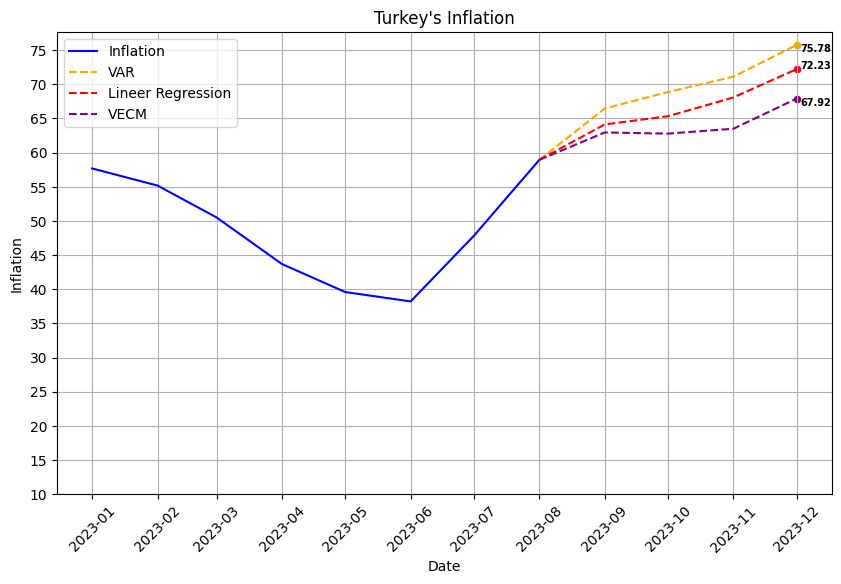

In [100]:
dates=pd.date_range('2008-02-01','2026-02-01' , freq='1M')-pd.offsets.MonthBegin(1)






# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(dff.iloc[191:199]["yillik_enflasyon_orani"], label='Inflation', color='blue')
#plt.plot(dfas2.iloc[198:202]["yillik_enflasyon_orani"],label='Your Forecast with monetary tightening', color='green')
plt.plot(dfas6.iloc[198:203]["yillik_enflasyon_orani"],'--',label='VAR', color='orange'    )
plt.plot(dff.iloc[198:203]["yillik_enflasyon_orani"],'--',label='Lineer Regression', color='red')
plt.plot(dfas4.iloc[198:203]["yillik_enflasyon_orani"],'--',label='VECM', color='purple')



plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dff.iloc[191:203].index, dff.iloc[191:203].index.strftime('%Y-%m'), rotation=45)
y_max = int(max(dff["yillik_enflasyon_orani"].iloc[191:203]))
y_min = 10
y_interval = 0.5
y_ticks = [y_min]
while y_ticks[-1] < y_max:
    y_ticks.append(y_ticks[-1] + 5)

son_dort_veri=dff["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri3=dfas4["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri5=dfas6["yillik_enflasyon_orani"].iloc[202:203]

# Y ekseni etiketlerini ayarlama
for i, v in enumerate(son_dort_veri):
    plt.annotate(f'{v:.2f}', (son_dort_veri.index[i], v), xytext=(3, 0), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri.index,son_dort_veri,color='red',s=20)


for i, v in enumerate(son_dort_veri3):
    plt.annotate(f'{v:.2f}', (son_dort_veri3.index[i], v), xytext=(3, -5), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri3.index,son_dort_veri3,color='purple',s=20)


for i,v in enumerate(son_dort_veri5):
    plt.annotate(f'{v:.2f}', (son_dort_veri5.index[i], v), xytext=(3, -5), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri5.index,son_dort_veri5,color='orange',s=20)




# Y ekseni etiketlerini ayarlama
plt.yticks(y_ticks)
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Bora\AppData\Local\Temp\ipykernel_9388\1938160495.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res6.append(results.params["const"]+results.params["Onceki USD/TL"]*df6["Onceki USD/TL"][i]+results.params["Para Arzi Onceki"]*dfn["Para Arzi Onceki"][i]+results.params["Kredi"]*df3["Kredi"][i]+results.params["Brent"]*df14["Brent"][i]+results.params["Politika Faizi"]*pfaiz["Politika Faizi"][i])


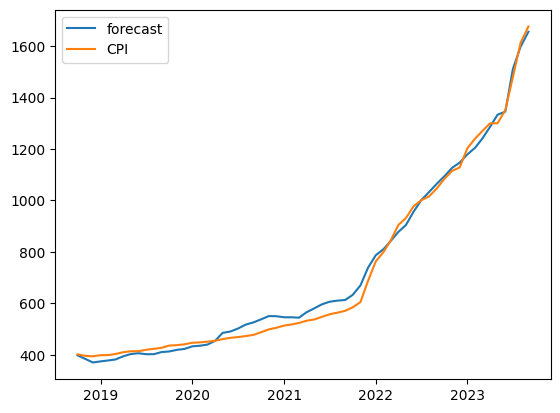

In [68]:
res6=[]
for i in range(-212,0):
    res6.append(results.params["const"]+results.params["Onceki USD/TL"]*df6["Onceki USD/TL"][i]+results.params["Para Arzi Onceki"]*dfn["Para Arzi Onceki"][i]+results.params["Kredi"]*df3["Kredi"][i]+results.params["Brent"]*df14["Brent"][i]+results.params["Politika Faizi"]*pfaiz["Politika Faizi"][i])
res6=pd.DataFrame(res6)
res6=res6.set_index(df.index)
res6.columns=["CPI"]
plt.plot(res6.tail(60),label="forecast")
plt.plot(df.tail(60),label="CPI")
plt.legend()

In [69]:
res6['onceki_yil_tufe'] = res6['CPI'].shift(12)


# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
res6['yillik_enflasyon_orani'] = ((res6['CPI'] / res6['onceki_yil_tufe']) - 1) * 100


# NaN değerleri (ilk 12 ay) veriden çıkarın
res6.dropna(inplace=True)
res6

,CPI,onceki_yil_tufe,yillik_enflasyon_orani
2007-02-01,141.348299,134.140530,5.373297
2007-03-01,142.087135,135.164405,5.121711
2007-04-01,144.360303,137.883286,4.697464
2007-05-01,144.245982,138.364403,4.250789
2007-06-01,145.835733,140.991601,3.435760
...,...,...,...
2023-05-01,1333.662327,904.505568,47.446558
2023-06-01,1345.686461,957.126250,40.596547
2023-07-01,1510.927051,1001.424043,50.877849
2023-08-01,1598.885698,1032.579674,54.843809


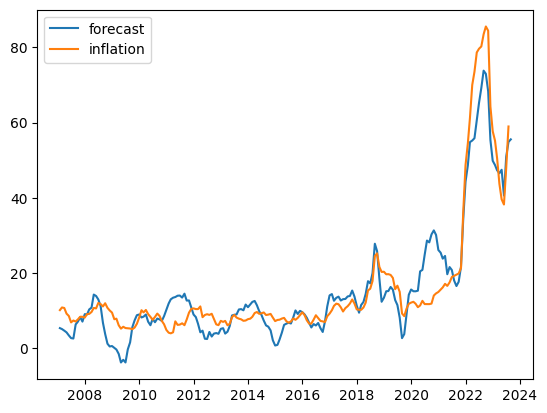

In [70]:
plt.plot(res6["yillik_enflasyon_orani"],label="forecast")
plt.plot(dff["yillik_enflasyon_orani"].head(199),label="inflation")
plt.legend()

In [71]:
dff["Onceki Ay TUFE"]=dff["CPI"].shift(1)

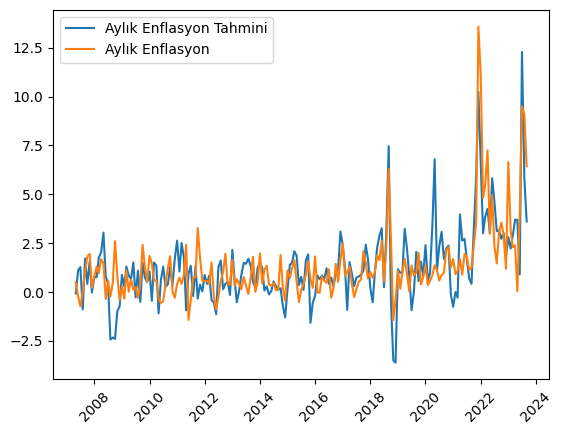

In [72]:
res6["Onceki Ay TUFE"]=res6["CPI"].shift(1)
res6["Aylık Enflasyon Tahmin"]=((res6["CPI"]/res6["Onceki Ay TUFE"]-1)*100)
res6["Gerceklesen Aylık Enflasyon"]=((dff["CPI"].head(219)/dff["Onceki Ay TUFE"].head(219)-1)*100)
plt.plot(res6["Aylık Enflasyon Tahmin"].tail(197),label="Aylık Enflasyon Tahmini")
plt.plot(res6["Gerceklesen Aylık Enflasyon"].tail(197),label="Aylık Enflasyon")
plt.xticks(rotation=45)
plt.legend()